# Clustering :

Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.

it is used for
* __For customer segmentation:__
* __For data analysis:__ 
* __As a dimensionality reduction technique:__ 
* __For anomaly detection (also called outlier detection):__ 
* __For semi-supervised learning:__
* __For search engines:__ 
* __To segment an image:__ 

#### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative (bottom-up approach):** 
1. This approach first considers all the points as individual clusters 
2. then finds out the similarity between two points, puts them into a cluster. 
3. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive (top-down approach):** 
1. It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster
2. and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This
3. continues until there are as many clusters as there are datapoints. This is also called the top-down approach.


# 1. K-Means Clustering:

# How does it Works? 
1. Choose the No. of K Clusters.
2. Select K random points, the K centroids.
3. Assign Each Data Point to the closest centroid....to forms K Clusters. 
4. calculate the actual centroids of the clusters and place the new Centroids.
5. Repeat step 3. untill there is no change.

# Problem with K-mean - Random Initialization Trap:
* The initialization of the centroid can change the results.

* Solution is **K-Means++ Algorithm.** it automaticaly resolves this problem.

# How to choose the right no. of clusters?
* **WCSS** - Within Cluster Sum of Squares  = 
$$ WCSS = \sum{d(P_i, C_1)^2} + \sum{d(P_i, C_2)^2} + \sum{d(P_i, C_3)^2}$$

Where , Pi - Point and C1, C2, C3 are the centroids of the clusters.

As  No of clusters $\Uparrow$ $\Rightarrow$ WCSS $\Downarrow$

So we plot a graph of No. of clusters V/S WCSS Value.

Aand we select the Elbow Point for the optimum no. of clusters.


# Lets See the Code.

In [4]:
# Importing the data.
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# We need not separate the X n Y bcz it's an unsupervised Ml Algorithm. and K-Means Doesn't require any Labels.
# We are removing the Unnecessary features.
# Here we are using only 2 features for showing the graph of clusters at the end.
X = data.iloc[:, [3, 4]].values

# Using the Elbow Method to find the Optimal No. of clusters.

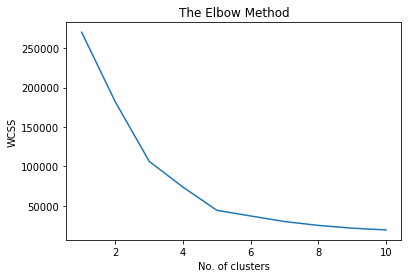

In [7]:
from sklearn.cluster import KMeans
wcss_lst = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss = kmeans.inertia_
    wcss_lst.append(wcss)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss_lst)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

As for No. of clusters = 5 the graph becomes almost flat, it decreases very slowly, hence selecting 5 Clusters as our optimum no.

In [49]:
# Training the Model on 5 clusters
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

Each of the cluster is a grp of customers n that will be our dependent variable.

In [50]:
y = kmeans.fit_predict(X)

In [51]:
print(y) # This is the index for the clusters.

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# Visualizing the clusters.

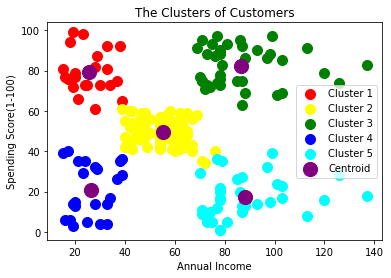

In [52]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X[y==4, 0], X[y==4, 1], s=100, c='cyan', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="purple", label="Centroid")
plt.title("The Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

In [53]:
 # saving the model to the local file system
import pickle
filename = 'K-Means_Cluster_model_of_Mall_Customers.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

#### Custom Centroid Initialization: